Podaj nazwę pliku z danymi (csv) bez rozszerzenia:JPY


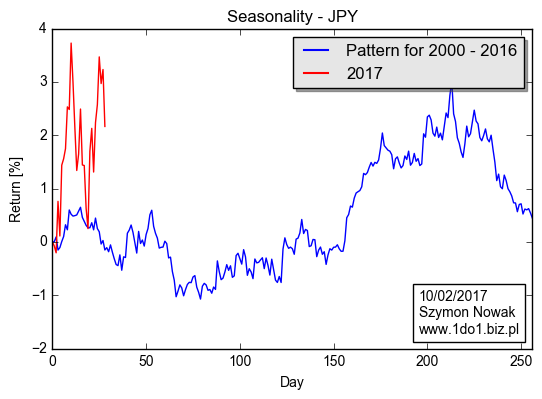

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.offsetbox import AnchoredText
import numpy as np
import datetime as dt
%matplotlib inline

jakie_dane = input('Podaj nazwę pliku z danymi (csv) bez rozszerzenia:')

# polska czcionka

matplotlib.rc('font', family='Arial')

# dzisiejsza data

dzisiaj = dt.datetime.today().strftime("%d/%m/%Y")

# wczytaj dane

gold = pd.read_csv('{}.csv'.format(jakie_dane),sep=',')

gold['Rok'] = pd.DatetimeIndex(gold['Data']).year

# utwórz listę lat

lista = gold['Rok'].unique()
lista_skrocona = np.delete(lista,-1)
ostatni_rok = lista[-1]
pierwszy_rok = lista[0]
przedostatni_rok = lista[-2]

# stwórz df z kolumnami dla lat

xau = pd.DataFrame()
for i in lista:
    xau[i] = []
    
# segregacja danych w kolumnach z latami

agg = gold.loc[0,'Rok']
i = 0
x = 0
for r in gold['Rok']:
    if gold.loc[x,'Rok'] == agg:
        xau.loc[i, agg] = gold.loc[x, 'Zamkniecie']
        i = i + 1
        x = x + 1
    else:
        agg = agg + 1
        i = 0
        xau.loc[i, agg] = gold.loc[x, 'Zamkniecie']
        i = i + 1
        x = x + 1
        
# stworzenie df dla stóp zwrotu
        
xl = pd.DataFrame()
for i in lista:
    xl[i] = []
    
# obliczenie liczby wierszy
    
dlugosc = len(xau)-1

# obliczenie stóp zwrotu

for xyz in lista:
    for zxy in range(0,dlugosc):
        xl.loc[zxy,xyz] = xau.loc[zxy+1,xyz]/xau.loc[0,xyz]*100
        
# dodanie 100 w pierwszym wierszu

for ewq in lista:
    xl.loc[-1] = 100

xl.index = xl.index + 1

xl = xl.sort_index()

# usunięcie ostatnich 4 wierszy

for lkj in range(dlugosc-3,dlugosc+1):
    xl.drop(lkj, inplace=True)
    
# odjęcie 100 

xl = xl - 100

# obliczenie średniej
    
srednia = xl[lista_skrocona].mean(axis=1)

# obliczenie osi OX

os = []
for poi in range(0,dlugosc-3):
    os.append(poi) 
    
# rysowanie wykresu

wykres = plt.figure()
axes = wykres.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(os, srednia, 'b', label='Pattern for {} - {}'.format(pierwszy_rok,przedostatni_rok))
axes.plot(os, xl[ostatni_rok], 'r', label='{}'.format(ostatni_rok))
axes.set_xlim([0,len(xl)-1])
axes.set_title('Seasonality - {}'.format(jakie_dane.upper()))
axes.set_xlabel('Day')
axes.set_ylabel('Return [%]')
anchored_text = AnchoredText("{}\nSzymon Nowak\nwww.1do1.biz.pl".format(dzisiaj) , loc=4)
axes.add_artist(anchored_text)

# legenda

legend = axes.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  

# zapisanie wykresu

plt.savefig('{}-seasonality.png'.format(jakie_dane))
plt.show()
plt.close() 

                            
